In [4]:
import pandas as pd
import numpy as np

In [5]:
data= pd.read_csv('Unemployment in India.csv')

## Exploratory Data Analysis

In [6]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Determining the years for which the data has been given

In [50]:
data[' Date'] = pd.to_datetime(data[' Date'], dayfirst=True)
data['Year'] = data[' Date'].dt.year
data.head(5)
startY= data['Year'].min()
stopY= data['Year'].max()
print(f"{startY} - {stopY}")

2019.0 - 2020.0


Types of Area

In [17]:
distinct_values = data['Area'].unique()
print(distinct_values)

['Rural' nan 'Urban']


### Basic Statistics of the given data

In [19]:
basic_stat = data[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
print(round(basic_stat.describe().T, 2))

                                          count        mean         std  \
 Estimated Unemployment Rate (%)          740.0       11.79       10.72   
 Estimated Employed                       740.0  7204460.03  8087988.43   
 Estimated Labour Participation Rate (%)  740.0       42.63        8.11   

                                               min         25%         50%  \
 Estimated Unemployment Rate (%)              0.00        4.66        8.35   
 Estimated Employed                       49420.00  1190404.50  4744178.50   
 Estimated Labour Participation Rate (%)     13.33       38.06       41.16   

                                                  75%          max  
 Estimated Unemployment Rate (%)                15.89        76.74  
 Estimated Employed                       11275489.50  45777509.00  
 Estimated Labour Participation Rate (%)        45.50        72.57  


### Information about each state

In [20]:
region_stats = data.groupby(['Region'])[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean()
print(round(region_stats, 2))

                   Estimated Unemployment Rate (%)   Estimated Employed  \
Region                                                                    
Andhra Pradesh                                7.48           8154093.18   
Assam                                         6.43           5354772.15   
Bihar                                        18.92          12366189.14   
Chandigarh                                   15.99            316831.25   
Chhattisgarh                                  9.24           4303498.57   
Delhi                                        16.50           2627512.86   
Goa                                           9.27            226308.33   
Gujarat                                       6.66          11402012.79   
Haryana                                      26.28           3557072.46   
Himachal Pradesh                             18.54           1059823.71   
Jammu & Kashmir                              16.19           1799931.67   
Jharkhand                

### Average unemployment rate in each state

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plot_unemp = data[[' Estimated Unemployment Rate (%)','Region']]
data_unemployed = plot_unemp.groupby('Region').mean().reset_index()

data_unemployed = data_unemployed.sort_values(' Estimated Unemployment Rate (%)')

fig = px.bar(data_unemployed, x='Region',y=' Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state', template='seaborn')
fig.show()

### Unemployment rate State v/s Region

In [24]:
unemployed_data = data[['Region', 'Area', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]

unemployed = unemployed_data.groupby(['Area', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

fig = px.sunburst(unemployed, path=['Area', 'Region'], values=' Estimated Unemployment Rate (%)', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.show()

### Visualizing change in unemployment rates from year 2019 to year 2020

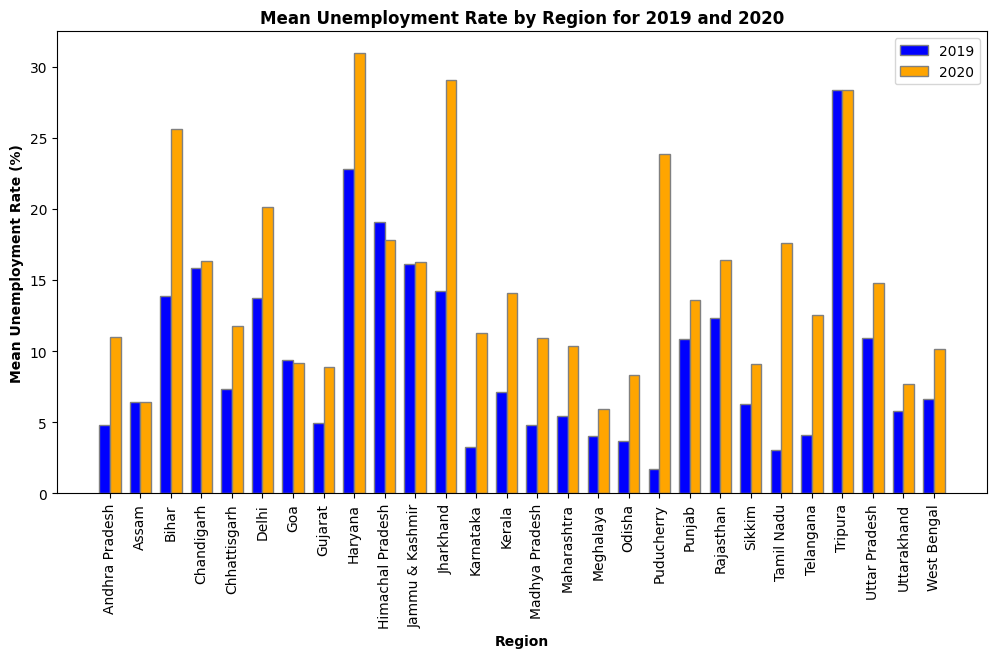

In [41]:
data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]

# Calculating mean unemployment rate for each region for 2019 and 2020
reg_means2019 = data_2019.groupby(['Region'])[' Estimated Unemployment Rate (%)'].mean()
reg_means2020 = data_2020.groupby(['Region'])[' Estimated Unemployment Rate (%)'].mean()

# Combining the results into a single DataFrame
combined = pd.DataFrame({'2019': reg_means2019, '2020': reg_means2020}).reset_index()

# Plotting the double bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = range(len(combined))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, combined['2019'], color='blue', width=bar_width, edgecolor='grey', label='2019')
ax.bar(r2, combined['2020'], color='orange', width=bar_width, edgecolor='grey', label='2020')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Region', fontweight='bold')
ax.set_ylabel('Mean Unemployment Rate (%)', fontweight='bold')
ax.set_title('Mean Unemployment Rate by Region for 2019 and 2020', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(combined))])
ax.set_xticklabels(combined['Region'])

plt.xticks(rotation=90)
# Add legend
ax.legend()

# Display the plot
plt.show()

### Monthly analysis of unemployment rates for years 2019 and 2020

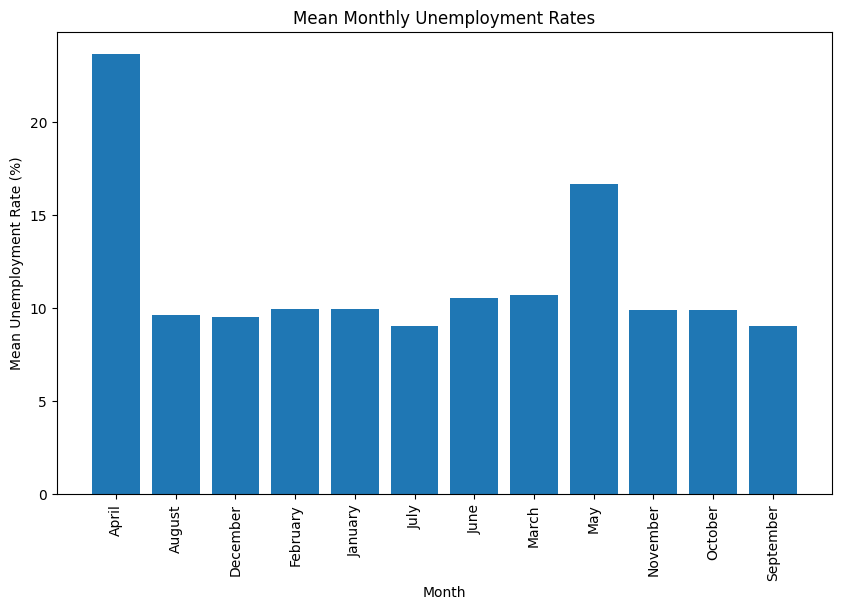

In [65]:
data['Month']= data[' Date'].dt.month_name()
mon_mean= data.groupby(['Month'])[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mon_mean.index, mon_mean.values)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Monthly Unemployment Rates')
plt.xticks(rotation=90)
plt.show()